Actual Code

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan  7 12:32:05 2019

@author: Krishna
"""
# Importing neccessary packages
import h5py
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt

# Setting the path
Path='drive/My Drive/Pre-processed'
p=os.listdir(Path)

X_Dp=[]          
X_Gado=[]
X_Flair=[]      
X_T1=[]
X_T2=[]
Y_Man1=[]

X=[]
Y1=[]

# Loading the MRI Scans 
for i in p[0:14] :
    
    q=os.listdir(os.path.join(Path,i))  
    
    x=nib.load(os.path.join(Path,i,q[0]))         
    f_Dp=x.get_fdata()
    f_Dp=np.asarray(f_Dp,'float32')
    for j in range(f_Dp.shape[2]):
        slice_Dp=cv.resize(f_Dp[:,:,j],(256,256),interpolation=cv.INTER_AREA)
        if(np.sum(slice_Dp)!=0):
          #  slice_Dp=slice_Dp/(np.max(slice_Dp)+0.00001)
            slice_Dp=(slice_Dp-np.mean(slice_Dp)+0.00001)/(np.std(slice_Dp)+0.00001)
        X_Dp.append(slice_Dp)
    
      
    
    x=nib.load(os.path.join(Path,i,q[1]))
    f_Flair=x.get_fdata()
    f_Flair=np.asarray(f_Flair,'float32')
    for j in range(f_Flair.shape[2]):
        slice_Flair=cv.resize(f_Flair[:,:,j],(256,256),interpolation=cv.INTER_AREA)
        if(np.sum(slice_Flair)!=0):
           # slice_Flair=slice_Flair/(np.max(slice_Flair)+0.00001)
            slice_Flair=(slice_Flair-np.mean(slice_Flair)+0.00001)/(np.std(slice_Flair)+0.00001)
        X_Flair.append(slice_Flair)
    
    
    x=nib.load(os.path.join(Path,i,q[2]))
    f_Gado=x.get_fdata()
    f_Gado=np.asarray(f_Gado,'float32')
    for j in range(f_Gado.shape[2]):
        slice_Gado=cv.resize(f_Gado[:,:,j],(256,256),interpolation=cv.INTER_AREA)
        if(np.sum(slice_Gado)!=0):
           # slice_Gado=slice_Gado/(np.max(slice_Gado)+0.00001)
            slice_Gado=(slice_Gado-np.mean(slice_Gado)+0.00001)/(np.std(slice_Gado)+0.00001)
        X_Gado.append(slice_Gado)
    
    
    x=nib.load(os.path.join(Path,i,q[3]))
    f_Man1=x.get_fdata()
    f_Man1=np.asarray(f_Man1,'float32')
    for j in range(f_Man1.shape[2]):
        slice_Man1=cv.resize(f_Man1[:,:,j],(256,256),interpolation=cv.INTER_AREA)
        slice_Man1=np.array(slice_Man1)
        slice_Man1[slice_Man1 > 0] = 1.0
        Y_Man1.append(slice_Man1)
    
    x=nib.load(os.path.join(Path,i,q[10]))
    f_T1=x.get_fdata()
    f_T1=np.asarray(f_T1,'float32')
    for j in range(f_T1.shape[2]):
        slice_T1=cv.resize(f_T1[:,:,j],(256,256),interpolation=cv.INTER_AREA)
        if(np.sum(slice_T1)!=0):
        #    slice_T1=slice_T1/(np.max(slice_T1)+0.00001)
            slice_T1=(slice_T1-np.mean(slice_T1)+0.00001)/(np.std(slice_T1)+0.00001)
        X_T1.append(slice_T1)
    
    
    x=nib.load(os.path.join(Path,i,q[11]))
    f_T2=x.get_fdata()
    f_T2=np.asarray(f_T2,'float32')
    for j in range(f_T2.shape[2]):
        slice_T2=cv.resize(f_T2[:,:,j],(256,256),interpolation=cv.INTER_AREA)
        if(np.sum(slice_T2)!=0):
         #   slice_T2=slice_T2/(np.max(slice_T2)+0.00001)
            slice_T2=(slice_T2-np.mean(slice_T2)+0.00001)/(np.std(slice_T2)+0.00001)
        X_T2.append(slice_T2)

for i in range(len(X_Dp)):
    X_Dp[i]=X_Dp[i].T
    X_Flair[i]=X_Flair[i].T
    X_Gado[i]=X_Gado[i].T
    X_T1[i]=X_T1[i].T
    X_T2[i]=X_T2[i].T
    Y_Man1[i]=Y_Man1[i].T


for i in range(len(X_Dp)):
    slice_Dp=X_Dp[i]
    slice_Dp=slice_Dp[:,:,np.newaxis]
    
    slice_Flair=X_Flair[i]
    slice_Flair=slice_Flair[:,:,np.newaxis]
    
    slice_Gado=X_Gado[i]
    slice_Gado=slice_Gado[:,:,np.newaxis]
    
    slice_T1=X_T1[i]
    slice_T1=slice_T1[:,:,np.newaxis]
    
    slice_T2=X_T2[i]
    slice_T2=slice_T2[:,:,np.newaxis]
    
    final_slice=np.concatenate((slice_Dp,slice_Flair,slice_Gado,slice_T1,slice_T2),axis=-1)
    
    if(np.sum(final_slice)!=0):
        X.append(final_slice)
        Y1.append(Y_Man1[i])

        
        
X=np.array(X,dtype='float32')
Y1=np.array(Y1,dtype='float32')


Y1=Y1[:,:,:,np.newaxis]


#np.save("X",X)
#np.save("Y",Y1)
#
#X = np.load("G:/Multiple Scelerosis/load_data/X.npy")
#Y = np.load("G:/Multiple Scelerosis/load_data/Y.npy")

with h5py.File('preprocessed_axial_data.h5', 'w') as hf:

    hf.create_dataset('input_X', data=X[:])
    hf.create_dataset('Manual_1', data=Y1[:])

#    
with h5py.File('inputs_no_null.h5', 'w') as hf:

    hf.create_dataset('Dp', data=X_Dp[:])
    hf.create_dataset('Flair', data=X_Flair[:])
    hf.create_dataset('Gado', data=X_Gado[:])
    hf.create_dataset('T1', data=X_T1[:]) 
    hf.create_dataset('T2', data=X_T2[:])
  #  hf.create_dataset('Y_Dp', data=Y_Dp[:])
   # hf.create_dataset('Y_Flair', data=Y_Flair[:])
   # hf.create_dataset('Y_Gado', data=Y_Gado[:])
#    hf.create_dataset('Y_T1', data=Y_T1[:]) 
 #   hf.create_dataset('Y_T2', data=Y_T2[:])
    
        


    

    

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:56:04 2019

@author: Krishna Chandra
"""
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
    upsample_6 = UpSampling2D((2, 2)) (conv_5)
    
    conv_6 = Convolution(upsample_6,256)
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model



In [0]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan  7 12:32:05 2019

@author: Krishna
"""
# Importing neccessary packages
import h5py
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt

def process():
# Setting the path
    Path='drive/My Drive/Pre-processed'
    p=os.listdir(Path)

    X_Dp=[]          
    X_Gado=[]
    X_Flair=[]      
    X_T1=[]
    X_T2=[]
    Y_Man1=[]

    X=[]
    Y1=[]

# Loading the MRI Scans 
    for i in p[0:14] :
    
        q=os.listdir(os.path.join(Path,i))  
    
        x=nib.load(os.path.join(Path,i,q[0]))         
        f_Dp=x.get_fdata()
        f_Dp=np.asarray(f_Dp,'float32')
        for j in range(f_Dp.shape[2]):
            slice_Dp=cv.resize(f_Dp[:,:,j],(256,256),interpolation=cv.INTER_AREA)
            if(np.sum(slice_Dp)!=0):
          #  slice_Dp=slice_Dp/(np.max(slice_Dp)+0.00001)
                slice_Dp=(slice_Dp-np.mean(slice_Dp)+0.00001)/(np.std(slice_Dp)+0.00001)
            X_Dp.append(slice_Dp)
    
      
    
        x=nib.load(os.path.join(Path,i,q[1]))
        f_Flair=x.get_fdata()
        f_Flair=np.asarray(f_Flair,'float32')
        for j in range(f_Flair.shape[2]):
            slice_Flair=cv.resize(f_Flair[:,:,j],(256,256),interpolation=cv.INTER_AREA)
            if(np.sum(slice_Flair)!=0):
           # slice_Flair=slice_Flair/(np.max(slice_Flair)+0.00001)
                slice_Flair=(slice_Flair-np.mean(slice_Flair)+0.00001)/(np.std(slice_Flair)+0.00001)
            X_Flair.append(slice_Flair)
    
    
        x=nib.load(os.path.join(Path,i,q[2]))
        f_Gado=x.get_fdata()
        f_Gado=np.asarray(f_Gado,'float32')
        for j in range(f_Gado.shape[2]):
            slice_Gado=cv.resize(f_Gado[:,:,j],(256,256),interpolation=cv.INTER_AREA)
            if(np.sum(slice_Gado)!=0):
           # slice_Gado=slice_Gado/(np.max(slice_Gado)+0.00001)
                slice_Gado=(slice_Gado-np.mean(slice_Gado)+0.00001)/(np.std(slice_Gado)+0.00001)
            X_Gado.append(slice_Gado)
    
    
        x=nib.load(os.path.join(Path,i,q[3]))
        f_Man1=x.get_fdata()
        f_Man1=np.asarray(f_Man1,'float32')
        for j in range(f_Man1.shape[2]):
            slice_Man1=cv.resize(f_Man1[:,:,j],(256,256),interpolation=cv.INTER_AREA)
            slice_Man1=np.array(slice_Man1)
            slice_Man1[slice_Man1 > 0] = 1.0
            Y_Man1.append(slice_Man1)
    
        x=nib.load(os.path.join(Path,i,q[10]))
        f_T1=x.get_fdata()
        f_T1=np.asarray(f_T1,'float32')
        for j in range(f_T1.shape[2]):
            slice_T1=cv.resize(f_T1[:,:,j],(256,256),interpolation=cv.INTER_AREA)
            if(np.sum(slice_T1)!=0):
        #    slice_T1=slice_T1/(np.max(slice_T1)+0.00001)
                slice_T1=(slice_T1-np.mean(slice_T1)+0.00001)/(np.std(slice_T1)+0.00001)
            X_T1.append(slice_T1)
    
    
        x=nib.load(os.path.join(Path,i,q[11]))
        f_T2=x.get_fdata()
        f_T2=np.asarray(f_T2,'float32')
        for j in range(f_T2.shape[2]):
            slice_T2=cv.resize(f_T2[:,:,j],(256,256),interpolation=cv.INTER_AREA)
            if(np.sum(slice_T2)!=0):
         #   slice_T2=slice_T2/(np.max(slice_T2)+0.00001)
                slice_T2=(slice_T2-np.mean(slice_T2)+0.00001)/(np.std(slice_T2)+0.00001)
            X_T2.append(slice_T2)

    for i in range(len(X_Dp)):
        X_Dp[i]=X_Dp[i].T
        X_Flair[i]=X_Flair[i].T
        X_Gado[i]=X_Gado[i].T
        X_T1[i]=X_T1[i].T
        X_T2[i]=X_T2[i].T
        Y_Man1[i]=Y_Man1[i].T


    for i in range(len(X_Dp)):
        slice_Dp=X_Dp[i]
        slice_Dp=slice_Dp[:,:,np.newaxis]
    
        slice_Flair=X_Flair[i]
        slice_Flair=slice_Flair[:,:,np.newaxis]
    
        slice_Gado=X_Gado[i]
        slice_Gado=slice_Gado[:,:,np.newaxis]
    
        slice_T1=X_T1[i]
        slice_T1=slice_T1[:,:,np.newaxis]
    
        slice_T2=X_T2[i]
        slice_T2=slice_T2[:,:,np.newaxis]
    
        final_slice=np.concatenate((slice_Dp,slice_Flair,slice_Gado,slice_T1,slice_T2),axis=-1)
    
        if(np.sum(final_slice)!=0):
            X.append(final_slice)
            Y1.append(Y_Man1[i])

        
        
    X=np.array(X,dtype='float32')
    Y1=np.array(Y1,dtype='float32')


    Y1=Y1[:,:,:,np.newaxis]


#np.save("X",X)
#np.save("Y",Y1)
#
#X = np.load("G:/Multiple Scelerosis/load_data/X.npy")
#Y = np.load("G:/Multiple Scelerosis/load_data/Y.npy")

    with h5py.File('preprocessed_axial_data.h5', 'w') as hf:

        hf.create_dataset('input_X', data=X[:])
        hf.create_dataset('Manual_1', data=Y1[:])

#    
    with h5py.File('inputs_no_null.h5', 'w') as hf:

        hf.create_dataset('Dp', data=Dp[:])
        hf.create_dataset('Flair', data=Flair[:])
        hf.create_dataset('Gado', data=Gado[:])
        hf.create_dataset('T1', data=T1[:]) 
        hf.create_dataset('T2', data=T2[:])
     #   hf.create_dataset('Y_Dp', data=Y_Dp[:])
      #  hf.create_dataset('Y_Flair', data=Y_Flair[:])
       # hf.create_dataset('Y_Gado', data=Y_Gado[:])
       # hf.create_dataset('Y_T1', data=Y_T1[:]) 
       # hf.create_dataset('Y_T2', data=Y_T2[:])
    
        


    

    

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:52:08 2019

@author: Krishna Chandra
"""

from keras import backend as K
import numpy as np
import tensorflow as tf

# Computing Dice_Coefficient
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

Using TensorFlow backend.


In [0]:
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt
    
def modality(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index != 3 and np.sum(_slice) != 0 ):                                           # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
                _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index == 3):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
    return X

# Removing the null samples as it contains no information
def remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual): 
     
    X=[]
    Y=[]
    
    for i in range(len(X_Dp)):        
        final_slice = np.concatenate((X_Dp[i],X_Flair[i],X_Gado[i],X_T1[i],X_T2[i]), axis = -1)
        if(np.sum(final_slice) != 0):        # checking whether the final slice is empty or not             
            X.append(final_slice)
            Y.append(Y_Manual[i])
 
#   Converting the list into array  
    X=np.array(X,dtype='float32')
    Y=np.array(Y,dtype='float32')
    
    return X,Y

#   To store the data in numpy format    
def store_data(X,Y):
    np.save("X.npy",X)
    np.save("Y.npy",Y)


        

In [0]:
"""
Created on Fri Dec 13 21:23:59 2019
@author: Krishna Chandra
"""


import numpy as np
import matplotlib.pyplot as plt

# Accuracy vs Epoch
def Accuracy_Graph(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    #plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
    
# Dice Similarity Coefficient vs Epoch
def Dice_coefficient_Graph(history):

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    #plt.title('Dice_Coefficient')
    plt.ylabel('Dice_Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
# Loss vs Epoch
def Loss_Graph(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 20:18:06 2019

@author: Krishna Chandra
"""



import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
X_Dp      =   modality(Path,0)
X_Flair   =   modality(Path,1)
X_Gado    =   modality(Path,2)
X_T1      =   modality(Path,10)
X_T2      =   modality(Path,11)
Y_Manual  =   modality(Path,3)

# Removing the null samples and concatenating the 5 modalities along the 3rd dimension
X, Y = remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual)


# Splitting the Whole data into Training and Testing data
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)

# Loding the modified U-net 
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('Modified_UNet.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)













Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 5) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 1472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
_____________

[0.0037227980005861074,
 0.99886024,
 0.8301803,
 0.87719697,
 0.85485375,
 0.99949354]

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy vs Epoch
def Accuracy_Graph(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    #plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
    
# Dice Similarity Coefficient vs Epoch
def Dice_coefficient_Graph(history):

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    #plt.title('Dice_Coefficient')
    plt.ylabel('Dice_Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
# Loss vs Epoch
def Loss_Graph(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
Accuracy_Graph(history)
Dice_coefficient_Graph(history)
Loss_Graph(history)


NameError: ignored

**ALL CONCATE**

In [0]:
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt
    
def modality(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index != 3 and np.sum(_slice) != 0 ):                                           # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
                _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index == 3):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
    return X

# Removing the null samples as it contains no information
def remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual): 
     
    X=[]
    Y=[]
    
    for i in range(len(X_Dp)):        
        final_slice = np.concatenate((X_Dp[i],X_Flair[i],X_Gado[i],X_T1[i],X_T2[i]), axis = -1)
        if(np.sum(final_slice) != 0):        # checking whether the final slice is empty or not             
            X.append(final_slice)
            Y.append(Y_Manual[i])
 
#   Converting the list into array  
    X=np.array(X,dtype='float32')
    Y=np.array(Y,dtype='float32')
    
    return X,Y

#   To store the data in numpy format    
def store_data(X,Y):
    np.save("X.npy",X)
    np.save("Y.npy",Y)


        

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:56:04 2019

@author: Krishna Chandra
"""
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
   
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model




In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 20:18:06 2019

@author: Krishna Chandra
"""



import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
X_Dp      =   modality(Path,0)
X_Flair   =   modality(Path,1)
X_Gado    =   modality(Path,2)
X_T1      =   modality(Path,10)
X_T2      =   modality(Path,11)
Y_Manual  =   modality(Path,3)

# Removing the null samples and concatenating the 5 modalities along the 3rd dimension
X, Y = remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual)


# Splitting the Whole data into Training and Testing data
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)

# Loding the modified U-net 
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('Modified_UNet.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)













Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 5) 0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 256, 256, 32) 1472        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 256, 256, 32) 128         conv2d_25[0][0]                  
__________________________________________________________________________________________________
activation_23 (Activation)      (None, 256, 256, 32) 0           batch_normalization_23[0][0]     
____________________________________________________________________________________________

[0.003964840076534319,
 0.9989239,
 0.84387165,
 0.9197561,
 0.82326454,
 0.99969274]

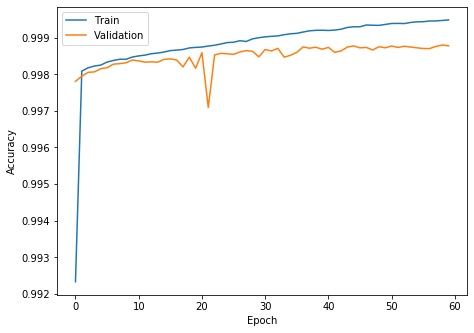

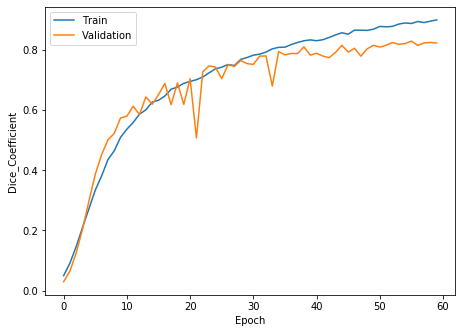

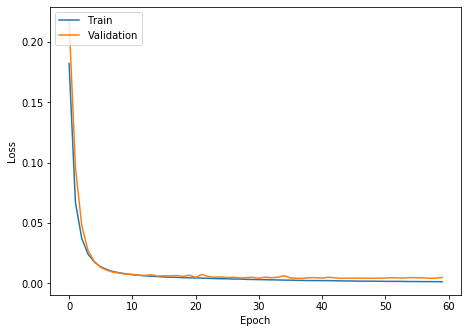

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy vs Epoch
def Accuracy_Graph(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    #plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
    
# Dice Similarity Coefficient vs Epoch
def Dice_coefficient_Graph(history):

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    #plt.title('Dice_Coefficient')
    plt.ylabel('Dice_Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
# Loss vs Epoch
def Loss_Graph(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
Accuracy_Graph(history)
Dice_coefficient_Graph(history)
Loss_Graph(history)


**ALTERNATE CONCATE**

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:56:04 2019

@author: Krishna Chandra
"""
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    conv_1 = Convolution(conv_1,32)
    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    conv_3 = Convolution(conv_3,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
    conv_5 = Convolution(conv_5,512)
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    conv_7 = Convolution(conv_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    conv_9 = Convolution(conv_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model




In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 20:18:06 2019

@author: Krishna Chandra
"""



import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
X_Dp      =   modality(Path,0)
X_Flair   =   modality(Path,1)
X_Gado    =   modality(Path,2)
X_T1      =   modality(Path,10)
X_T2      =   modality(Path,11)
Y_Manual  =   modality(Path,3)

# Removing the null samples and concatenating the 5 modalities along the 3rd dimension
X, Y = remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual)


# Splitting the Whole data into Training and Testing data
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)

# Loding the modified U-net 
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('Modified_UNet.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)













Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 5) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 1472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
_____________

[0.0038127185932050147,
 0.9986763,
 0.786333,
 0.89457685,
 0.79337204,
 0.99959224]

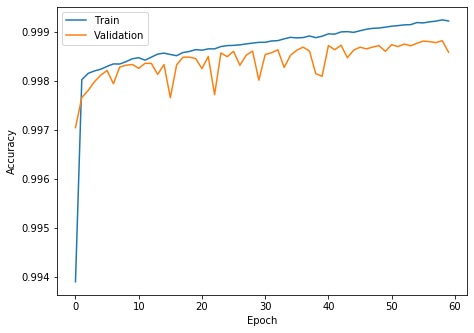

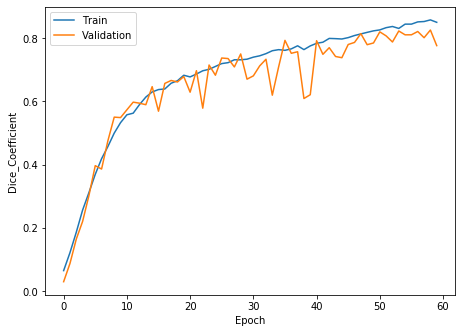

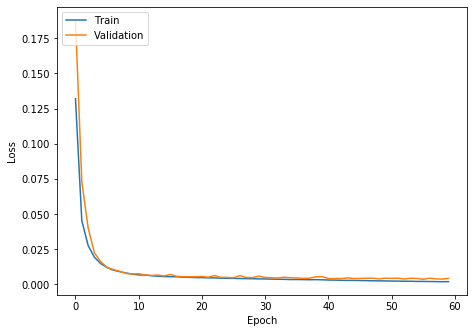

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy vs Epoch
def Accuracy_Graph(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    #plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
    
# Dice Similarity Coefficient vs Epoch
def Dice_coefficient_Graph(history):

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    #plt.title('Dice_Coefficient')
    plt.ylabel('Dice_Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
# Loss vs Epoch
def Loss_Graph(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
Accuracy_Graph(history)
Dice_coefficient_Graph(history)
Loss_Graph(history)


ALTERNATE DOUBLE

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:56:04 2019

@author: Krishna Chandra
"""
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    conv_1 = Convolution(inputs,32)
    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    conv_2 = Convolution(maxp_1,64)

    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    conv_3 = Convolution(maxp_2,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    conv_4 = Convolution(maxp_3,256)
4/xwFIt7zYI2_rBrg_RUCmNJpPhJOoUXNwuNN0JFM6IPL2q8jXI8uwAbc
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
    conv_5 = Convolution(maxp_4,512)
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    conv_6 = Convolution(upsample_6,256)
    
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    conv_7 = Convolution(upsample_7,128)
    
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    conv_8 = Convolution(upsample_8,64)

    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    conv_9 = Convolution(upsample_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model




In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 20:18:06 2019

@author: Krishna Chandra
"""



import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
X_Dp      =   modality(Path,0)
X_Flair   =   modality(Path,1)
X_Gado    =   modality(Path,2)
X_T1      =   modality(Path,10)
X_T2      =   modality(Path,11)
Y_Manual  =   modality(Path,3)

# Removing the null samples and concatenating the 5 modalities along the 3rd dimension
X, Y = remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual)


# Splitting the Whole data into Training and Testing data
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)

# Loding the modified U-net 
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('Modified_UNet.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)













Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 5) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 1472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 256, 32) 0           batch_normalization_1[0][0]      
_____________

[0.0043177661726720076, 0.99872905, 0.8185155, 0.82937396, 0.890223, 0.9992019]

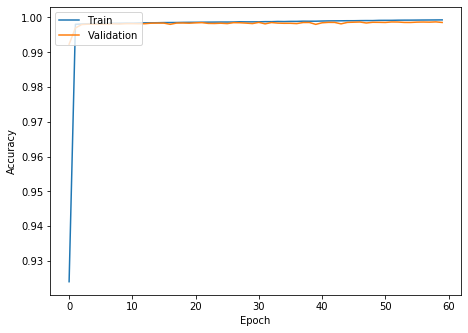

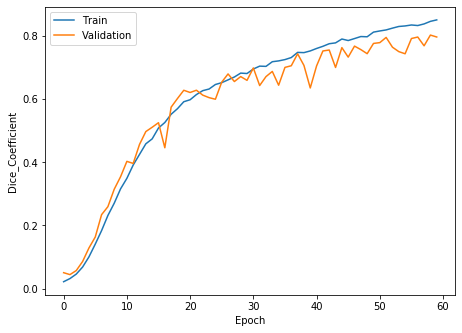

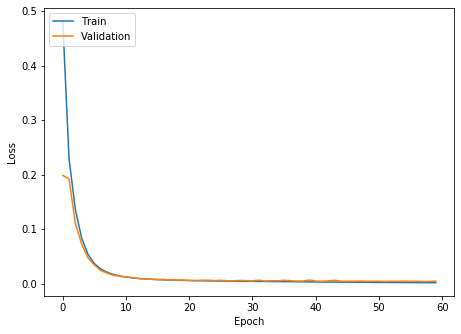

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy vs Epoch
def Accuracy_Graph(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    #plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
    
# Dice Similarity Coefficient vs Epoch
def Dice_coefficient_Graph(history):

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    #plt.title('Dice_Coefficient')
    plt.ylabel('Dice_Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
# Loss vs Epoch
def Loss_Graph(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
Accuracy_Graph(history)
Dice_coefficient_Graph(history)
Loss_Graph(history)


**DROPOUT AND ALTERNATE DOUBLE **

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:52:08 2019

@author: Krishna Chandra
"""

from keras import backend as K
import numpy as np
import tensorflow as tf

# Computing Dice_Coefficient
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [0]:
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt
    
def modality(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index != 3 and np.sum(_slice) != 0 ):                                           # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
                _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index == 3):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
    return X

# Removing the null samples as it contains no information
def remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual): 
     
    X=[]
    Y=[]
    
    for i in range(len(X_Dp)):        
        final_slice = np.concatenate((X_Dp[i],X_Flair[i],X_Gado[i],X_T1[i],X_T2[i]), axis = -1)
        if(np.sum(final_slice) != 0):        # checking whether the final slice is empty or not             
            X.append(final_slice)
            Y.append(Y_Manual[i])
 
#   Converting the list into array  
    X=np.array(X,dtype='float32')
    Y=np.array(Y,dtype='float32')
    
    return X,Y

#   To store the data in numpy format    
def store_data(X,Y):
    np.save("X.npy",X)
    np.save("Y.npy",Y)


        

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:56:04 2019

@author: Krishna Chandra
"""
import tensorflow as tf
#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    conv_1 = Convolution(conv_1,32)

    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    maxp_1= Dropout(0.4)(maxp_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    maxp_2= Dropout(0.2)(maxp_2)

    conv_3 = Convolution(maxp_2,128)
    conv_3 = Convolution(conv_3,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    maxp_3= Dropout(0.4)(maxp_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    maxp_4= Dropout(0.2)(maxp_4)
    
    conv_5 = Convolution(maxp_4,512)
    conv_5 = Convolution(conv_5,512)
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    conv_7 = Convolution(conv_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    conv_9 = Convolution(conv_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model




In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 20:18:06 2019

@author: Krishna Chandra
"""



import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
X_Dp      =   modality(Path,0)
X_Flair   =   modality(Path,1)
X_Gado    =   modality(Path,2)
X_T1      =   modality(Path,10)
X_T2      =   modality(Path,11)
Y_Manual  =   modality(Path,3)

# Removing the null samples and concatenating the 5 modalities along the 3rd dimension
X, Y = remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual)


# Splitting the Whole data into Training and Testing data
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)

# Loding the modified U-net 
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('Modified_UNet.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)













Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 5) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 1472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
_____________

[0.0036006605309643305,
 0.9988412,
 0.81898135,
 0.8684201,
 0.8630816,
 0.99943125]

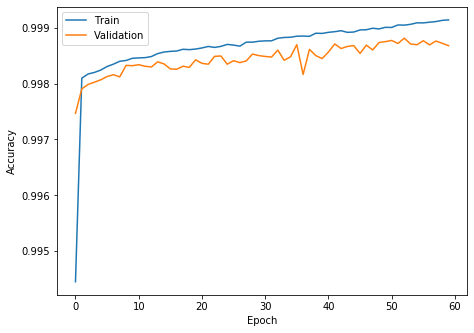

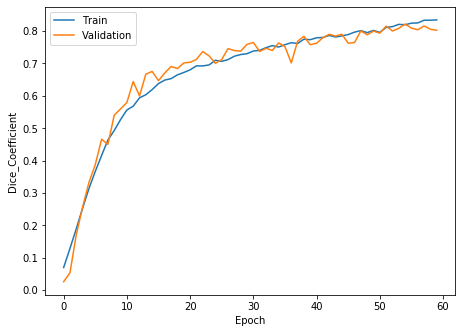

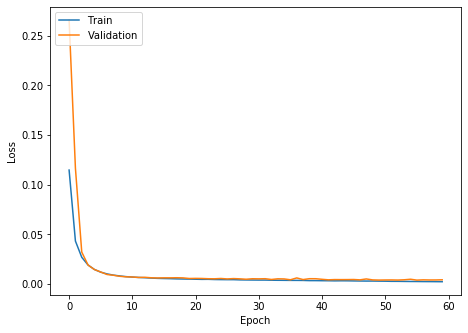

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy vs Epoch
def Accuracy_Graph(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    #plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
    
# Dice Similarity Coefficient vs Epoch
def Dice_coefficient_Graph(history):

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    #plt.title('Dice_Coefficient')
    plt.ylabel('Dice_Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
# Loss vs Epoch
def Loss_Graph(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()
Accuracy_Graph(history)
Dice_coefficient_Graph(history)
Loss_Graph(history)


### **COMPARISON AND ANALYSIS**

 **UNION**-*ALL CONCATE Model*

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:52:08 2019

@author: Krishna Chandra
"""

from keras import backend as K
import numpy as np
import tensorflow as tf

# Computing Dice_Coefficient
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

ERROR! Session/line number was not unique in database. History logging moved to new session 59


Using TensorFlow backend.


In [0]:
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt
    
def modality(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index != 3 and np.sum(_slice) != 0 ):                                           # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
                _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index == 3):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
   # X=np.array(X,dtype='float32')
    return X
def modality_gt(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index != 3 and np.sum(_slice) != 0 ):     
              i=0                                      # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
              #  _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index == 3):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
   # X=np.array(X,dtype='float32')
    return X

# Removing the null samples as it contains no information
def remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual): 
     
    X=[]
    Y=[]
    
    for i in range(len(X_Dp)):        
        final_slice = np.concatenate((X_Dp[i],X_Flair[i],X_Gado[i],X_T1[i],X_T2[i]), axis = -1)
        if(np.sum(final_slice) != 0):        # checking whether the final slice is empty or not             
            X.append(final_slice)
            Y.append(Y_Manual[i])
 
#   Converting the list into array  
    X=np.array(X,dtype='float32')
    Y=np.array(Y,dtype='float32')
    
    return X,Y


#   To store the data in numpy format    


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 13 18:56:04 2019

@author: Krishna Chandra
"""
import tensorflow as tf
import numpy as np

import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
   
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model




In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
X_Dp_t      =   modality(Path,0)
X_Flair_t   =   modality(Path,1)
X_Gado_t    =   modality(Path,2)
X_T1_t      =   modality(Path,10)
X_T2_t      =   modality(Path,11)


In [0]:

Y_1  =   modality_gt(Path,3)
Y_2  =   modality_gt(Path,4)
Y_3  =   modality_gt(Path,5)
Y_4  =   modality_gt(Path,6)
Y_5  =   modality_gt(Path,7)
Y_6  =   modality_gt(Path,8)
Y_7  =   modality_gt(Path,9)

In [0]:
print(Y_1[0])

In [0]:
from PIL import Image
cnt=0
for i in Y_1[2500:3500]:
  img = Image.fromarray(np.array(i[0]) , 'L')
  img.save('drive/My Drive/MS_data/union/images_test_Y_man/my_'+str(cnt)+'.png')
  cnt+=1;
  img.show()
  

In [0]:
print(len(X_Dp[0][0][0]))

1


In [0]:
def store_data(X,Y):
    np.save("drive/My Drive/MS_data/X_union.npy",X)
    np.save("drive/My Drive/MS_data/Y_union.npy",Y)




In [0]:
import math
def union(Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7):
  Y=[]
  sum2=[]
  flag=0
  #y=np.array()
  print("A")
  for i in range (len(Y_1)):
    #print(Y_1[i])
    
        f=np.concatenate((Y_1[i],Y_2[i],Y_3[i],Y_4[i],Y_5[i],Y_6[i],Y_7[i]),axis=-1)
        sum=np.sum(f,axis=2)
       # print(sum)
        
          #print(j)
        sum_1=np.divide(sum,7)
        sum_1=np.ceil(sum_1)
        sum2.append(sum_1)

    #sum2=np.array(sum2,dtype='float32')
    
        
  return sum2
      

      
    


In [0]:
Y_Manual=union(Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7)
Y_Manual_1=np.array(Y_Manual,dtype='float32')

print(len(Y_Manual))

A


KeyboardInterrupt: ignored

In [0]:
print(np.min(Y_Manual[2000]))
Y_Manual_1=np.array(Y_Manual,dtype='float32')
print(np.max(Y_Manual_1))

0.0
1006.0


In [0]:
from PIL import Image
cnt=0
for i in Y_Manual[2500:3500]:
  img = Image.fromarray(np.array(i) , 'L')
  img.save('drive/My Drive/MS_data/union/images_test_Y_man/my_'+str(cnt)+'.png')
  cnt+=1;
  img.show()
  

KeyboardInterrupt: ignored

In [0]:
Y=np.array(Y_Manual,dtype='float32')
np.save("drive/My Drive/MS_data/Y_manual.npy",Y)


In [0]:
import numpy as np

Y=np.load("drive/My Drive/MS_data/Y_manual.npy")






# Splitting the Whole data into Training and Testing data


In [0]:
Y_Manual=list(Y)

In [0]:
print(len(Y_Manual))

5184


In [0]:
Y_M_1=Y_Manual[:1001]
Y_M_2=Y_Manual[1001:2001]
Y_M_3=Y_Manual[2001:3001]
Y_M_4=Y_Manual[3001:4001]
Y_M_5=Y_Manual[4001:]

In [0]:
print(len(Y_M_1)+len(Y_M_2)+len(Y_M_3)+len(Y_M_4)+len(Y_M_5))

5184


In [0]:
p=[]
y=[]
z=[]
a=[]
n=1
for i in Y_M_1:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  p.append(y)
  y=[]
  n+=1



In [0]:
q=[]
y=[]
z=[]
a=[]
n=3000
for i in Y_M_5:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  q.append(y)
  y=[]
  n+=1


In [0]:
temp=np.array(q)
np.save("drive/My Drive/MS_data/temp_m_5.npy",temp)

In [0]:
temp1=np.load("drive/My Drive/MS_data/temp_m_1.npy")
temp2=np.load("drive/My Drive/MS_data/temp_m_2.npy")
temp3=np.load("drive/My Drive/MS_data/temp_m_3.npy")
temp4=np.load("drive/My Drive/MS_data/temp_m_4.npy")
temp5=np.load("drive/My Drive/MS_data/temp_m_5.npy")

In [0]:
temp1=list(temp1)
temp2=list(temp2)
temp3=list(temp3)
temp4=list(temp4)
temp5=list(temp5)

In [0]:
j=1001

for i in temp5:
  print(j)
  temp1.append(i)
  j+=1


In [0]:
temp=np.array(temp1)
np.save("drive/My Drive/MS_data/Y_MAN_5184.npy",temp)

NameError: ignored

In [0]:
print(len(temp))

5184


In [0]:
temp=np.load("drive/My Drive/MS_data/Y_MAN_5184.npy")

In [0]:
print(temp)

In [0]:
Y_Manual=temp

In [0]:
X, Y = remove_null_samples(X_Dp_t, X_Flair_t, X_Gado_t, X_T1_t, X_T2_t, Y_Manual)

In [0]:
print(len(Y))
store_data(X,Y)

2940


In [0]:
import numpy as np
X=np.load("drive/My Drive/MS_data/X_union.npy")
Y=np.load("drive/My Drive/MS_data/Y_union.npy")



In [0]:
from PIL import Image
cnt=0
for i in Y:
  img = Image.fromarray(np.array(i) , 'L')
  img.save('drive/My Drive/MS_data/union/images_test/my_'+str(cnt)+'.png')
  cnt+=1;
  img.show()
  

In [0]:
from PIL import Image
cnt=0
for i in X:
  img = Image.fromarray(np.array(i) , 'L')
  img.save('drive/My Drive/MS_data/union/images_train/my_'+str(cnt)+'.png')
  cnt+=1;
  print(cnt)
  img.show()

In [0]:
Path='drive/My Drive/Pre-processed'
Y_1  =   modality_gt(Path,3)

In [0]:
X_1, Y_1 = remove_null_samples(X_Dp_t, X_Flair_t, X_Gado_t, X_T1_t, X_T2_t, Y_1)

In [0]:
np.save("drive/My Drive/MS_data/Y_1.npy",Y_1)
np.save("drive/My Drive/MS_data/X_1.npy",X_1)

In [0]:
import numpy as np
X=np.load("drive/My Drive/MS_data/X_union.npy")
Y=np.load("drive/My Drive/MS_data/Y_union.npy")


In [0]:
import numpy as np

Y=np.load("drive/My Drive/MS_data/Y_union.npy")



In [0]:
print(len(Y))

2942


In [0]:
Y_1=Y[:1401]
Y_2=Y[1401:]


In [0]:
print(len(Y_1))
print(len(Y_2))

1400
1541


In [0]:
p=[]
y=[]
z=[]
a=[]
n=1
for i in Y_1:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  p.append(y)
  y=[]
  n+=1


#print(p)

      

In [0]:
temp=np.array(p)
np.save("drive/My Drive/MS_data/temp_1.npy",temp)

In [0]:
q=[]
y=[]
z=[]
a=[]
n=1401
for i in Y_2:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  q.append(y)
  y=[]
  n+=1


In [0]:
temp2=np.array(q)
np.save("drive/My Drive/MS_data/temp_2.npy",temp2)

In [0]:
import numpy as np

temp=np.load("drive/My Drive/MS_data/temp_1.npy")

In [0]:
temp2=np.load("drive/My Drive/MS_data/temp_2.npy")

In [0]:
p=list(temp)

In [0]:
q=list(temp2)

In [0]:
j=1401
for i in q:
  print(j)
  p.append(i)
  j+=1


In [0]:
np.save("drive/My Drive/MS_data/Y_Manual_2.npy",p)
Y=np.load("drive/My Drive/MS_data/Y_Manual_2.npy")
X=np.load("drive/My Drive/MS_data/X_union.npy")

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)
#print(X_train)
print(X_test)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#print(Y_train)
print(Y_test)
# Loding the modified U-net 

[[[[-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   ...
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]]

  [[-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   ...
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]]

  [[-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   [-0.10365924 -0.10786358 -0.08113487 -0.7821694  -0.6822675 ]
   ...


In [0]:
print(X)

[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   ...
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   ...
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   ...
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  ...

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   ...
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   ...
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   ...
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   ...
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   ...
   [0. 0. 0. 0. 0.]
 

In [0]:
print(Y)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('drive/My Drive/MS_data/Modified_UNet_union.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)

INTERSECTION-ALL CONCATE Model

In [0]:
from keras import backend as K
import numpy as np
import tensorflow as tf

# Computing Dice_Coefficient
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

Using TensorFlow backend.


In [0]:
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt
    
def modality(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index != 3 and np.sum(_slice) != 0 ):                                           # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
                _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index == 3):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
   # X=np.array(X,dtype='float32')
    return X
def modality_gt(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index != 3 and np.sum(_slice) != 0 ):     
              i=0                                      # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
              #  _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index == 3):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
   # X=np.array(X,dtype='float32')
    return X

# Removing the null samples as it contains no information
def remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual): 
     
    X=[]
    Y=[]
    
    for i in range(len(X_Dp)):        
        final_slice = np.concatenate((X_Dp[i],X_Flair[i],X_Gado[i],X_T1[i],X_T2[i]), axis = -1)
        if(np.sum(final_slice) != 0):        # checking whether the final slice is empty or not             
            X.append(final_slice)
            Y.append(Y_Manual[i])
 
#   Converting the list into array  
    X=np.array(X,dtype='float32')
    Y=np.array(Y,dtype='float32')
    
    return X,Y


#   To store the data in numpy format    


In [0]:
import tensorflow as tf
import numpy as np

import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
   
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
Y_1  =   modality_gt(Path,3)
Y_2  =   modality_gt(Path,4)
Y_3  =   modality_gt(Path,5)
Y_4  =   modality_gt(Path,6)
Y_5  =   modality_gt(Path,7)
Y_6  =   modality_gt(Path,8)
Y_7  =   modality_gt(Path,9)

In [0]:
import math
def intersection(Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7):
  Y=[]
  sum2=[]
  flag=0
  #y=np.array()
  print("A")
  for i in range (len(Y_1)):
    #print(Y_1[i])
    
        f=np.concatenate((Y_1[i],Y_2[i],Y_3[i],Y_4[i],Y_5[i],Y_6[i],Y_7[i]),axis=-1)
        sum=np.sum(f,axis=2)
       # print(sum)
        
          #print(j)
        sum_1=np.divide(sum,7)
        sum_1=np.floor(sum_1)
        sum2.append(sum_1)

    #sum2=np.array(sum2,dtype='float32')
    
        
  return sum2
      

In [0]:
Y_Manual=intersection(Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7)


print(len(Y_Manual))

A
5184


In [0]:
Y=np.array(Y_Manual,dtype='float32')
np.save("drive/My Drive/MS_data/Y_manual_intersection.npy",Y)

In [0]:
Y=np.load("drive/My Drive/MS_data/Y_manual_intersection.npy")

In [0]:
Y_Manual=list(Y)

In [0]:
X_Dp_t      =   modality(Path,0)
X_Flair_t   =   modality(Path,1)
X_Gado_t    =   modality(Path,2)
X_T1_t      =   modality(Path,10)
X_T2_t      =   modality(Path,11)


In [0]:
X, Y = remove_null_samples(X_Dp_t, X_Flair_t, X_Gado_t, X_T1_t, X_T2_t, Y_Manual)

In [0]:
def store_data(X,Y):
    np.save("drive/My Drive/MS_data/X_intersection.npy",X)
    np.save("drive/My Drive/MS_data/Y_intersection.npy",Y)

In [0]:
print(len(Y))
store_data(X,Y)

2940


In [0]:
import numpy as np
X=np.load("drive/My Drive/MS_data/X_intersection.npy")
Y=np.load("drive/My Drive/MS_data/Y_intersection.npy")



In [0]:
import numpy as np

Y=np.load("drive/My Drive/MS_data/Y_intersection.npy")

In [0]:
Y_1=Y[:1401]
Y_2=Y[1401:]


In [0]:
print(len(Y_1))
print(len(Y_2))

1401
1539


In [0]:
p=[]
y=[]
z=[]
a=[]
n=1
for i in Y_1:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  p.append(y)
  y=[]
  n+=1



In [0]:
temp=np.array(p)
np.save("drive/My Drive/MS_data/temp_1_in.npy",temp)

In [0]:
q=[]
y=[]
z=[]
a=[]
n=1401
for i in Y_2:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  q.append(y)
  y=[]
  n+=1

In [0]:
temp2=np.array(q)
np.save("drive/My Drive/MS_data/temp_2_in.npy",temp2)

In [0]:
import numpy as np

temp=np.load("drive/My Drive/MS_data/temp_1.npy")

In [0]:
p=list(temp)

In [0]:
q=list(temp2)

In [0]:
j=1401
for i in q:
  print(j)
  p.append(i)
  j+=1


In [0]:
np.save("drive/My Drive/MS_data/Y_Manual_in_2.npy",p)
Y=np.load("drive/My Drive/MS_data/Y_Manual_in_2.npy")
X=np.load("drive/My Drive/MS_data/X_intersection.npy")

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)
#print(X_train)
#print(X_test)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#print(Y_train)
#print(Y_test)
# Loding the modified U-net 

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('drive/My Drive/MS_data/Modified_UNet_union.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)
#Loss_Graph(history)

MAJOR VOTE-ALL CONCATE


In [0]:
from keras import backend as K
import numpy as np
import tensorflow as tf

# Computing Dice_Coefficient
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [0]:
import tensorflow as tf
import numpy as np
import os
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt
    
def modality(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index != 3 and np.sum(_slice) != 0 ):                                           # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
                _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index == 3):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
   # X=np.array(X,dtype='float32')
    return X
def modality_gt(Path,index):
    X = []
    p=os.listdir(Path) 

    for i in p[:14]:                                                                      # Loading all the folders in the given path
        q = os.listdir(os.path.join(Path,i))     

        x = nib.load(os.path.join(Path,i,q[index]))         
        f = x.get_fdata()
        f = np.asarray(f,'float32')
        
        for j in range(f.shape[2]):                                                        # Processing the MRI Scan in the axial view
            _slice = cv.resize(f[:,:,j],(256,256),interpolation=cv.INTER_NEAREST)             # Resizing the slice to the shape(256,256)
            if(index != 3 and np.sum(_slice) != 0 ):     
              i=0                                      # To check whether the slice is null or not
              #  _slice = _slice / (np.max(_slice) + 0.00001)                               # Normalization
              #  _slice = (_slice - np.mean(_slice) + 0.00001) / (np.std(_slice) + 0.00001) # Standardization
            elif(index == 3):   # if index = 3, Then it is output mask and we don't normalize or standardize it 
                _slice = np.array(_slice)
                _slice[_slice > 0] = 1.0
            _slice = _slice.T
            _slice = _slice[:,:,np.newaxis]
            X.append(_slice)
   # X=np.array(X,dtype='float32')
    return X

# Removing the null samples as it contains no information
def remove_null_samples(X_Dp, X_Flair, X_Gado, X_T1, X_T2, Y_Manual): 
     
    X=[]
    Y=[]
    
    for i in range(len(X_Dp)):        
        final_slice = np.concatenate((X_Dp[i],X_Flair[i],X_Gado[i],X_T1[i],X_T2[i]), axis = -1)
        if(np.sum(final_slice) != 0):        # checking whether the final slice is empty or not             
            X.append(final_slice)
            Y.append(Y_Manual[i])
 
#   Converting the list into array  
    X=np.array(X,dtype='float32')
    Y=np.array(Y,dtype='float32')
    
    return X,Y


#   To store the data in numpy format    


In [0]:
import tensorflow as tf
import numpy as np

import keras
from keras.models import Model, load_model
from keras.layers import Input ,BatchNormalization , Activation 
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x) 
    return x

def model(input_shape):
    
    inputs = Input((input_shape))
    
    conv_1 = Convolution(inputs,32)
    
    maxp_1 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_2)
    
    conv_3 = Convolution(maxp_2,128)
    
    maxp_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_3)
    
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same') (conv_4)
    
    conv_5 = Convolution(maxp_4,512)
   
    upsample_6 = UpSampling2D((2, 2)) (conv_5)

    upsample_6 = concatenate([upsample_6, conv_4])
    
    conv_6 = Convolution(upsample_6,256)
    upsample_7 = UpSampling2D((2, 2)) (conv_6)
    
    upsample_7 = concatenate([upsample_7, conv_3])
    
    conv_7 = Convolution(upsample_7,128)
    upsample_8 = UpSampling2D((2, 2)) (conv_7)
    
    upsample_8 = concatenate([upsample_8, conv_2])

    conv_8 = Convolution(upsample_8,64)
    upsample_9 = UpSampling2D((2, 2)) (conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9,32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs]) 
    
    return model


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


#import dataPrepare as process
# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual SegmentationX_Dp      =   modality(Path,0)
#import Modified_UNet 
#import plots
#import Metrics

# Setting the path
Path='drive/My Drive/Pre-processed'



# Loading all the 5 different modalities of each MRI Scan of all 15 different patients and 1st rater Manual Segmentation
Y_1  =   modality_gt(Path,3)
Y_2  =   modality_gt(Path,4)
Y_3  =   modality_gt(Path,5)
Y_4  =   modality_gt(Path,6)
Y_5  =   modality_gt(Path,7)
Y_6  =   modality_gt(Path,8)
Y_7  =   modality_gt(Path,9)

In [0]:
import math
def Major(Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7):
  Y=[]
  sum2=[]
  flag=0
  #y=np.array()
  print("A")
  for i in range (len(Y_1)):
    #print(Y_1[i])
    
        f=np.concatenate((Y_1[i],Y_2[i],Y_3[i],Y_4[i],Y_5[i],Y_6[i],Y_7[i]),axis=-1)
        sum=np.sum(f,axis=2)
       # print(sum)
        
          #print(j)
        sum_1=np.divide(sum,4)
        sum_1=np.floor(sum_1)
        sum2.append(sum_1)

    #sum2=np.array(sum2,dtype='float32')
    
        
  return sum2
      

In [0]:
Y_Manual=Major(Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7)


print(len(Y_Manual))

In [0]:
Y=np.array(Y_Manual,dtype='float32')
np.save("drive/My Drive/MS_data/Y_manual_Major.npy",Y)

In [0]:
Y_Manual=list(Y)

In [0]:
X_Dp_t      =   modality(Path,0)
X_Flair_t   =   modality(Path,1)
X_Gado_t    =   modality(Path,2)
X_T1_t      =   modality(Path,10)
X_T2_t      =   modality(Path,11)


In [0]:
X, Y = remove_null_samples(X_Dp_t, X_Flair_t, X_Gado_t, X_T1_t, X_T2_t, Y_Manual)

In [0]:
def store_data(X,Y):
    np.save("drive/My Drive/MS_data/X_Major.npy",X)
    np.save("drive/My Drive/MS_data/Y_Major.npy",Y)

In [0]:
print(len(Y))
store_data(X,Y)

In [0]:
import numpy as np
X=np.load("drive/My Drive/MS_data/X_Majorn.npy")
Y=np.load("drive/My Drive/MS_data/Y_Major.npy")



In [0]:
import numpy as np
X=np.load("drive/My Drive/MS_data/X_Major.npy")
Y=np.load("drive/My Drive/MS_data/Y_Major.npy")



In [0]:
Y_1=Y[:1401]
Y_2=Y[1401:]


In [0]:
p=[]
y=[]
z=[]
a=[]
n=1
for i in Y_1:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  p.append(y)
  y=[]
  n+=1

In [0]:
temp=np.array(p)
np.save("drive/My Drive/MS_data/temp_1_maj.npy",temp)

In [0]:
q=[]
y=[]
z=[]
a=[]
n=1401
for i in Y_2:
  print(n)
  for j in i:
    for k in j:
      #print(k)
      a.append(k)
     # print(a)
      z.append(a)
      a=[]
    #print(z)
    y.append(z)
    z=[]
  q.append(y)
  y=[]
  n+=1

In [0]:
temp2=np.array(q)
np.save("drive/My Drive/MS_data/temp_2_maj.npy",temp2)

In [0]:
p=list(temp)

In [0]:
q=list(temp2)

In [0]:
j=1401
for i in q:
  print(j)
  p.append(i)
  j+=1

In [0]:
np.save("drive/My Drive/MS_data/Y_Manual_major_2.npy",p)
Y=np.load("drive/My Drive/MS_data/Y_Manual_major_2.npy")
X=np.load("drive/My Drive/MS_data/X_Major.npy")

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=32)
#print(X_train)
#print(X_test)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#print(Y_train)
#print(Y_test)
# Loding the modified U-net 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input ,BatchNormalization , Activation 
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
model = model(input_shape = (256,256,5))
model.summary()

checkpointer = ModelCheckpoint('drive/My Drive/MS_data/Modified_UNet_union.h5', verbose=1)
callback_list=[checkpointer]

# Compiling the model
k_adam=Adam(lr=0.001)
model.compile(optimizer=k_adam, loss='binary_crossentropy', metrics=['accuracy',dice_coef,precision,sensitivity,specificity])
# Fitting the model over the data
history = model.fit(X_train,Y_train,batch_size=32,epochs=60,validation_split=0.20,verbose=1,initial_epoch=0,callbacks=callback_list)

# Saving the model
model.save('Modified_UNet.h5')
history.history

# Evaluating the model on the training and testing data 
model.evaluate(x=X_train, y=Y_train, batch_size=32 , verbose=1, sample_weight=None, steps=None)
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

# Plotting the Graphs of Accuracy, Dice_coefficient, Loss at each epoch on Training and Testing data
#Accuarcy_Graph(history)
#Dice_coefficient_Graph(history)